In [115]:
from PIL import Image
im = Image.open(r"./group15/train/26.png")

# patches of size n*n
n=7

# getting consecuitve pathces of n*n from im
def get_patches(im):
    px = im.load()
    patches = []
    for i in range(0,  im.size[0] - n):
        for j in range(0, im.size[1] - n):
            patch = []
            for k in range(i, i + n):
                for l in range(j, j + n):
                    patch.append(px[k, l])
            patches.append(patch)
    return patches

import numpy as np
pathces = np.array(get_patches(im))
print(pathces.shape)

# find mean and covariace of each patch
def mean_cov(patches):
    mean = np.mean(patches, axis=1)
    var = np.var(patches, axis=1)
    return mean, var
mean, var = mean_cov(pathces)

print(mean.shape)
print(var.shape)

(255025, 49)
(255025,)
(255025,)


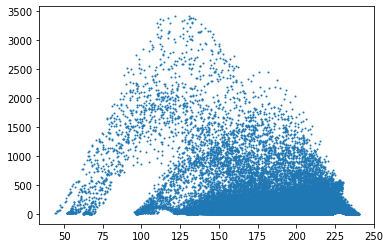

In [116]:
# plot the mean and covariance
import matplotlib.pyplot as plt
plt.scatter(mean, var, s=1)
plt.show()

In [117]:
# making data points from mean and var
data = []
for i in range(len(mean)):
    data.append([mean[i], var[i]])
data = np.array(data)
print(data.shape)

(255025, 2)


In [118]:
import random
import numpy as np  # Import the numpy library for np.mean and np.var

class clusterPoint:
    def __init__(self, point, cluster):
        self.point = point
        self.cluster = cluster

class K_means:
    class cluster:
        def __init__(self):
            self.points = []
            self.mean = None

        def set(self, points):
            self.points = points
            self.mean = np.mean(points, axis=0)
            self.var = np.var(points, axis=0)

        def center(self):
            return self.mean

    def dissimilarity(self, point1, point2):
        return np.linalg.norm(np.array(point1) - np.array(point2))

    def __init__(self, k):
        self.k = k
        self.clusters = [None for i in range(k)]

    def fit(self, data):
        # Initializing cluster centers
        centers = set()
        while len(centers) < self.k:
            centers.add(random.randint(0, len(data) - 1))
        centers = list(centers)

        self.clusters = [data[i] for i in centers]

        while True:
            # Initialize cluster_points as an empty list
            cluster_points = []

            # Assign each feature vector to a cluster (hard clustering)
            for point in data:
                which_cluster = 0
                for i in range(self.k):
                    if self.dissimilarity(point, self.clusters[i]) < self.dissimilarity(point, self.clusters[which_cluster]):
                        which_cluster = i
                cluster_points.append(clusterPoint(point, which_cluster))

            # Update cluster parameters and cluster centers
            for i in range(self.k):
                self.clusters[i] = self.cluster()
                self.clusters[i].set([cluster_point.point for cluster_point in cluster_points if cluster_point.cluster == i])

            new_centers = []
            for i in range(self.k):
                new_centers.append(self.clusters[i].center())

            # Check for convergence by comparing cluster centers
            converged = True
            for i in range(self.k):
                if not np.array_equal(new_centers[i], self.clusters[i].center()):
                    converged = False
                    break

            if converged:
                break
            else:
                # Update cluster_points for the next iteration
                cluster_points = []

        return cluster_points

# Example usage:
# Create an instance of K_means with the desired number of clusters (k)
kmeans = K_means(3)
# Pass your data to the fit method to perform clustering
cluster_points = kmeans.fit(data)


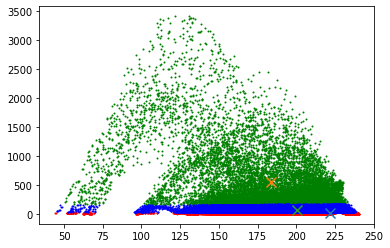

In [119]:
# Plot the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for j in range(kmeans.k):
    plt.scatter([cluster_point.point[0] for cluster_point in cluster_points if cluster_point.cluster == j],
                [cluster_point.point[1] for cluster_point in cluster_points if cluster_point.cluster == j],
                color=colors[j], s=1)
    
for j in range(kmeans.k):
    plt.scatter(kmeans.clusters[j].center()[0], kmeans.clusters[j].center()[1],marker='x', s=100)
    

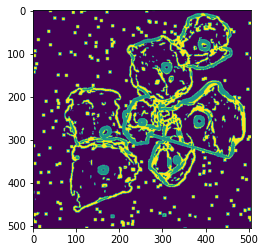

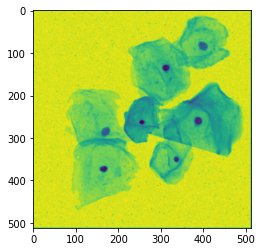

In [120]:
# plt the clusterings
labels = np.array([cluster_point.cluster for cluster_point in cluster_points])
plt.imshow(labels.reshape(im.size[1] - n, im.size[0] - n).T)
plt.show()
# plt the image
plt.imshow(im)

In [121]:
# import random
# import numpy as np

# class clusterPoint:
#     def __init__(self, point, cluster):
#         self.point = point
#         self.cluster = cluster

# class K_means:
#     class cluster:
#         def __init__(self,sample_point):
#             self.points = []
#             self.mean = np.array(sample_point)
#             self.covariance = np.zeros((len(sample_point), len(sample_point)))
#             # need non-zero covariance to avoid singular matrix error
#             self.covariance[np.diag_indices(len(sample_point))] = 1

#         def set(self, points):
#             self.points = points
#             self.mean = np.mean(points, axis=0)
#             self.covariance = np.cov(points, rowvar=False)

#     def mahalanobis_distance(self, point, center, covariance):
#         diff = np.array(point) - np.array(center)
#         inv_covariance = np.linalg.inv(covariance)
#         return np.sqrt(np.dot(np.dot(diff, inv_covariance), diff))

#     def __init__(self, k):

#         self.k = k
#         self.clusters = [None for i in range(k)]

#     def fit(self, data):
#         centers = set()
#         while len(centers) < self.k:
#             centers.add(random.randint(0, len(data) - 1))
#         centers = list(centers)

#         for i in range(self.k):
#             self.clusters[i] = self.cluster(data[centers[i]])

#         converged = False

#         while not converged:
#             # Assign each feature vector to a cluster (hard clustering)
#             cluster_points = []
#             for point in data:
#                 distances = [self.mahalanobis_distance(point, cluster.center(), cluster.covariance) for cluster in self.clusters]
#                 which_cluster = np.argmin(distances)
#                 cluster_points.append(clusterPoint(point, which_cluster))

#             # Update cluster parameters and cluster centers
#             for i in range(self.k):
#                 self.clusters[i].set([cluster_point.point for cluster_point in cluster_points if cluster_point.cluster == i])

#             new_centers = [cluster.center() for cluster in self.clusters]

#             # Check for convergence by comparing cluster centers
#             converged = all(np.allclose(new_centers[i], self.clusters[i].center()) for i in range(self.k))

#         return cluster_points

# # Example usage:
# # Create an instance of K_means with the desired number of clusters (k)
# kmeans = K_means(3)
# # Pass your data to the fit method to perform clustering
# cluster_points = kmeans.fit(data)


In [122]:
cluster_points = kmeans.fit(data)


In [123]:
print(pathces.shape)

(255025, 49)


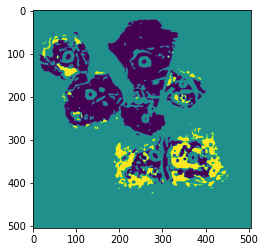

In [124]:
labels = np.array([cluster_point.cluster for cluster_point in cluster_points])
plt.imshow(labels.reshape(im.size[0] - n, im.size[1] - n)[::-1])


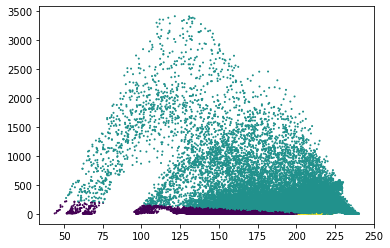

In [125]:
#plot the labels
import matplotlib.pyplot as plt
plt.scatter(mean, var, s=1, c=labels)
plt.show()